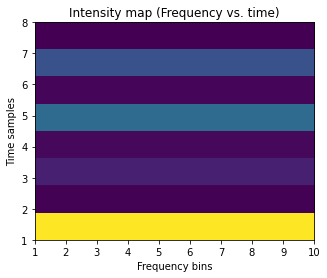

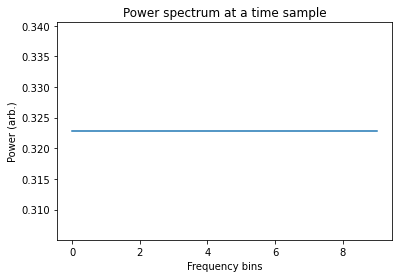

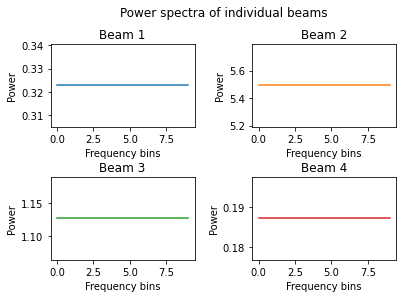

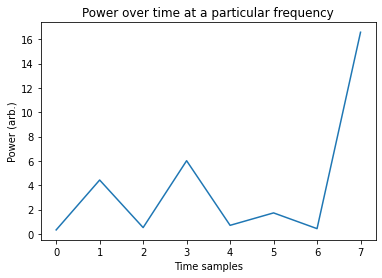

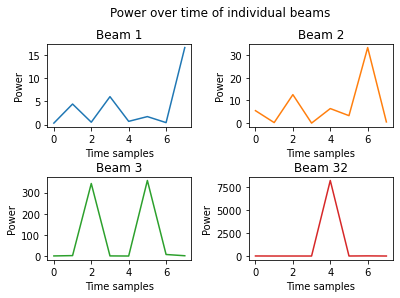

In [26]:
# This script reshapes the one dimensional array from the beamformer and plots the response for analysis
import matplotlib.pyplot as plt
from array import array
import numpy as np

# Open text file containing beamformer output
#f= open("output_d_c.txt", 'r')
f= open("output_d_cuda.txt", 'r')
#= open("output_d_c_simple.txt", 'r')
#f = open("output_d_cuda_simple.txt", 'r')

# Read file contents
contents = f.read()

# Split elements based on new line i.e. '\n'
contents_tmp = contents.split('\n')

# Convert contents from string to float
contents_float = np.zeros(len(contents_tmp))
for i in range(0,len(contents_tmp)-1):
    contents_float[i] = float(contents_tmp[i])

# Array dimensions
N_beam = 64
N_bin = 10
N_time = 8

# Reshape array to 3D -> Time X Bins X Beams
contents_array = contents_float[0:(N_time*N_bin*N_beam)].reshape(N_time,N_bin,N_beam)

beam_idx = 0 # beam index to plot
time_idx = 0 # time sample index to plot

# Plot intensity map of frequency vs. time
# "interpolation ='none'" removes interpolation which was there by default. 
# I'm only removing it for the sake of accurate analysis and diagnosis.
plt.imshow(contents_array[0:N_time,0:N_bin,beam_idx], extent=[1, N_bin, 1, N_time], interpolation='none')
#plt.imshow(contents_array[0:N_time,0:N_bin,beam_idx], extent=[1, N_bin, 1, N_time], interpolation='bicubic')
plt.title('Intensity map (Frequency vs. time)')
plt.ylabel('Time samples')
plt.xlabel('Frequency bins')
plt.show()

# Plot of power spectrum
plt.plot(contents_array[time_idx,0:N_bin,beam_idx])
plt.title('Power spectrum at a time sample')
plt.xlabel('Frequency bins')
plt.ylabel('Power (arb.)')
plt.show()

#fig, axs = plt.subplots(1, 2)
#fig.suptitle('Power spectra of individual beams')
#axs[0].plot(contents_array[time_idx,0:N_bin,0])
#axs[0].set_title('Beam 1')
#axs[1].plot(contents_array[time_idx,0:N_bin,1], 'tab:orange')
#axs[1].set_title('Beam 2')

fig, axs = plt.subplots(2, 2)
fig.suptitle('Power spectra of individual beams')
axs[0, 0].plot(contents_array[time_idx,0:N_bin,0])
axs[0, 0].set_title('Beam 1')
axs[0, 1].plot(contents_array[time_idx,0:N_bin,1], 'tab:orange')
axs[0, 1].set_title('Beam 2')
axs[1, 0].plot(contents_array[time_idx,0:N_bin,2], 'tab:green')
axs[1, 0].set_title('Beam 3')
axs[1, 1].plot(contents_array[time_idx,0:N_bin,3], 'tab:red')
axs[1, 1].set_title('Beam 4')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.85,
                    wspace=0.4, 
                    hspace=0.6)

for ax in axs.flat:
    ax.set(xlabel='Frequency bins', ylabel='Power')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
plt.show()

# Plot of power over time
freq_idx = 5 # Frequency to plot
plt.plot(contents_array[0:N_time,freq_idx,beam_idx])
plt.title('Power over time at a particular frequency')
plt.xlabel('Time samples')
plt.ylabel('Power (arb.)')
plt.show()

fig, axs = plt.subplots(2, 2)
fig.suptitle('Power over time of individual beams')
axs[0, 0].plot(contents_array[0:N_time,freq_idx,0])
axs[0, 0].set_title('Beam 1')
axs[0, 1].plot(contents_array[0:N_time,freq_idx,1], 'tab:orange')
axs[0, 1].set_title('Beam 2')
axs[1, 0].plot(contents_array[0:N_time,freq_idx,2], 'tab:green')
axs[1, 0].set_title('Beam 3')
axs[1, 1].plot(contents_array[0:N_time,freq_idx,32], 'tab:red')
axs[1, 1].set_title('Beam 32')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.85, 
                    wspace=0.4, 
                    hspace=0.6)

for ax in axs.flat:
    ax.set(xlabel='Time samples', ylabel='Power')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
plt.show()

f.close()

# Check with incrementing set of simulated data and coefficients
chk_flag = 0
if(chk_flag==1):
    beam_idx = 64 # Change beam index to see what the output of the corresponding beam should be
    tmp_calc = 0
    for i in range(1,65):
        tmp_calc = tmp_calc + beam_idx*i
        
    print(tmp_calc) # Output of beamformer
    print(tmp_calc*tmp_calc + tmp_calc*tmp_calc) # Output power with imaginary part set to zero

In [148]:
print(contents_array[0:N_time,0:N_bin,63])

[[0.00000e+00 0.00000e+00 3.54419e+10 0.00000e+00 0.00000e+00 3.54419e+10
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 3.54419e+10 0.00000e+00 0.00000e+00 3.54419e+10
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 3.54419e+10 0.00000e+00 0.00000e+00 3.54419e+10
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 3.54419e+10 0.00000e+00 0.00000e+00 3.54419e+10
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 3.54419e+10 0.00000e+00 0.00000e+00 3.54419e+10
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 3.54419e+10 0.00000e+00 0.00000e+00 3.54419e+10
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 3.54419e+10 0.00000e+00 0.00000e+00 3.54419e+10
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 3.54419e+10 0.00000e+00 0.00000e+00 3.54419e+10
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]]

In [165]:
chk_flag = 1
if(chk_flag==1):
    tmp_calc = 0
    beam_idx = 64
    for i in range(1,65):
        tmp_calc = tmp_calc + beam_idx*i
        
    print(tmp_calc)
    print(tmp_calc*tmp_calc + tmp_calc*tmp_calc)

133120
35441868800


In [13]:
contents_array.shape

(8, 10, 64)